### env

python

In [1]:
import sys

print(sys.version)

3.10.19 (main, Oct 21 2025, 16:43:05) [GCC 11.2.0]


CPU/GPU

In [2]:
import torch

# CPU/GPU 사용 여부 확인
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("현재 실행 장치: GPU (CUDA)")
    print("GPU 이름:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("현재 실행 장치: CPU")

현재 실행 장치: GPU (CUDA)
GPU 이름: NVIDIA RTX 6000 Ada Generation


### utils

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

### data

In [42]:
# data
df = pd.read_csv("/home/khs/data/hoso_data/hoso_patch_depth_data.csv")
print(len(df))
df

278


,년/월/일,측정소명,분류번호,회차,경도,위도,채수시각,수온(℃),클로로필 a(㎎/㎥),투명도(m),...,image_id_S2,회차번호,층부,temp_surface,temp_mid,temp_bottom,secchi_surface,chla_surface,chla_mid,chla_bottom
0,2018/02/22,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:07,2.9,9.3,2.5,...,20180222T021709_20180222T021703_T52SBD,1.0,상층부,2.9,3.6,3.6,2.5,9.3,8.6,8.2
1,2018/10/15,남강댐1(진양호),2018B30,1회차 상층부,"128°1'53.9""","35°10'4.8""",09:30,17.7,4.5,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,17.7,17.6,17.5,0.6,4.5,4.0,4.1
2,2018/10/15,남강댐2(진양호),2018B20,1회차 상층부,"127°59'15.1""","35°9'17.6""",09:00,18.0,4.3,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,18.0,17.5,17.4,0.6,4.3,4.2,4.0
3,2018/10/15,남강댐3(진양호),2018B10,1회차 상층부,"127°58'38.4""","35°12'24.1""",10:00,17.8,5.4,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,17.8,17.2,16.8,0.6,5.4,5.9,6.9
4,2018/12/24,충주댐1,1003B40,4회차 상층부,"127°59'47.39""","37°0'2.52""",14:55,10.0,1.1,2.5,...,20181224T022111_20181224T022106_T52SDF,4.0,상층부,10.0,9.2,8.5,2.5,1.1,1.1,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2025/10/15,밀양댐1,2021B40,1회차 상층부,"128°55'55.3""","35°28'53.2""",10:30,22.4,19.6,2.5,...,20251015T020701_20251015T021252_T52SDE,1.0,상층부,22.4,14.1,8.5,2.5,19.6,1.4,0.7
274,2025/10/20,주암댐1,4007B70,2회차 상층부,"127°14'26.74""","35°3'23.78""",10:39,22.7,8.3,3.2,...,20251020T022131_20251020T022129_T52SCD,2.0,상층부,22.7,18.8,13.1,3.2,8.3,1.3,0.6
275,2025/10/23,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:04,21.7,5.7,1.3,...,20251023T021649_20251023T022418_T52SBD,1.0,상층부,21.7,19.3,12.3,1.3,5.7,6.7,3.0
276,2025/10/23,나주댐2,5003B10,1회차 상층부,"126°50'55.32""","34°55'39.36""",11:15,22.1,9.5,1.5,...,20251023T021649_20251023T022418_T52SBD,1.0,상층부,22.1,21.1,20.6,1.5,9.5,13.5,7.6


In [43]:
## npy로 불러오기
# df = np.load("/home/khs/data/hoso_data/chla_sentinel2_2D_df.npy", allow_pickle=True)
# df

In [44]:
# 고유 측정소 리스트 확인
unique_stations = df["측정소명"].unique().tolist()

print("측정소 리스트 (총 {}개):".format(len(unique_stations)))
print(unique_stations)

측정소 리스트 (총 68개):
['나주댐1', '남강댐1(진양호)', '남강댐2(진양호)', '남강댐3(진양호)', '충주댐1', '장흥댐2', '장흥댐3', '장흥댐4', '주암댐1', '군위댐1', '군위댐2', '수어댐1', '주암조정지댐1(상사호)', '주암조정지댐3(상사호)', '장흥댐1', '나주댐2', '대청댐4', '대청댐6', '합천댐1', '합천댐2', '대청댐1', '연초댐2', '주암댐2', '주암댐3', '김천부항댐', '장성댐1', '부안댐1', '부안댐2', '부안댐3', '임하댐1', '임하댐2', '광동댐', '보령댐3', '소양강댐2', '소양강댐3', '보현산댐', '합천댐3', '대청댐3', '충주댐2', '충주댐3', '충주댐4', '구천댐', '화천댐1(파로호)', '화천댐2(파로호)', '화천댐3(파로호)', '달방댐', '장성댐2', '영천댐1(영천호)', '청평댐2', '청평댐3', '가창댐1', '섬진강댐1(옥정호)', '보령댐1', '보령댐2', '도암댐', '군남댐', '담양댐1', '담양댐2', '대청댐2', '연초댐1', '영천댐2(영천호)', '용담댐3', '팔당댐1', '팔당댐2', '팔당댐3', '팔당댐4', '청평댐1', '밀양댐1']


preprocessing

In [45]:
# 회차번호 추출
df["회차번호"] = df["회차"].str.extract(r"(\d+)").astype(float)

# 같은 날짜·측정소에서 회차가 여러 개인 그룹 찾기
multi_mask = df.groupby(["측정소명", "년/월/일"])["회차번호"].transform("nunique") > 1
multi_df = df[multi_mask].sort_values(["측정소명", "년/월/일", "회차번호"])

# 결과 출력
print(f"같은 날짜·측정소에서 회차가 여러 개인 경우: {multi_df['측정소명'].nunique()}개 지점, 총 {len(multi_df)}행\n")
print(multi_df[["측정소명", "년/월/일", "회차"]].drop_duplicates().head(20))

같은 날짜·측정소에서 회차가 여러 개인 경우: 0개 지점, 총 0행

Empty DataFrame
Columns: [측정소명, 년/월/일, 회차]
Index: []


surface

In [46]:
# 상층부 데이터만 선택
# 상층부 or 층부 없는 데이터
df = df[df["회차"].str.contains("상층부", na=False) | ~df["회차"].str.contains("층", na=False)]
print(len(df))
df

278


,년/월/일,측정소명,분류번호,회차,경도,위도,채수시각,수온(℃),클로로필 a(㎎/㎥),투명도(m),...,image_id_S2,회차번호,층부,temp_surface,temp_mid,temp_bottom,secchi_surface,chla_surface,chla_mid,chla_bottom
0,2018/02/22,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:07,2.9,9.3,2.5,...,20180222T021709_20180222T021703_T52SBD,1.0,상층부,2.9,3.6,3.6,2.5,9.3,8.6,8.2
1,2018/10/15,남강댐1(진양호),2018B30,1회차 상층부,"128°1'53.9""","35°10'4.8""",09:30,17.7,4.5,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,17.7,17.6,17.5,0.6,4.5,4.0,4.1
2,2018/10/15,남강댐2(진양호),2018B20,1회차 상층부,"127°59'15.1""","35°9'17.6""",09:00,18.0,4.3,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,18.0,17.5,17.4,0.6,4.3,4.2,4.0
3,2018/10/15,남강댐3(진양호),2018B10,1회차 상층부,"127°58'38.4""","35°12'24.1""",10:00,17.8,5.4,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,17.8,17.2,16.8,0.6,5.4,5.9,6.9
4,2018/12/24,충주댐1,1003B40,4회차 상층부,"127°59'47.39""","37°0'2.52""",14:55,10.0,1.1,2.5,...,20181224T022111_20181224T022106_T52SDF,4.0,상층부,10.0,9.2,8.5,2.5,1.1,1.1,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2025/10/15,밀양댐1,2021B40,1회차 상층부,"128°55'55.3""","35°28'53.2""",10:30,22.4,19.6,2.5,...,20251015T020701_20251015T021252_T52SDE,1.0,상층부,22.4,14.1,8.5,2.5,19.6,1.4,0.7
274,2025/10/20,주암댐1,4007B70,2회차 상층부,"127°14'26.74""","35°3'23.78""",10:39,22.7,8.3,3.2,...,20251020T022131_20251020T022129_T52SCD,2.0,상층부,22.7,18.8,13.1,3.2,8.3,1.3,0.6
275,2025/10/23,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:04,21.7,5.7,1.3,...,20251023T021649_20251023T022418_T52SBD,1.0,상층부,21.7,19.3,12.3,1.3,5.7,6.7,3.0
276,2025/10/23,나주댐2,5003B10,1회차 상층부,"126°50'55.32""","34°55'39.36""",11:15,22.1,9.5,1.5,...,20251023T021649_20251023T022418_T52SBD,1.0,상층부,22.1,21.1,20.6,1.5,9.5,13.5,7.6


extra index

In [47]:
# # extra index
# # NDCI (Normalized Difference Chlorophyll Index)
# df["NDCI"] = (df["B5"] - df["B4"]) / (df["B5"] + df["B4"])
#
# # NDWI (Normalized Difference Water Index)
# df["NDWI"] = (df["B3"] - df["B8"]) / (df["B3"] + df["B8"])
#
# # NDVI (Normalized Difference Vegetation Index)
# df["NDVI"] = (df["B8"] - df["B4"]) / (df["B8"] + df["B4"])
#
# # FAI (Floating Algae Index)
# # 파장 값 (nm)
# λ6, λ8, λ11 = 740, 842, 1610
#
# # 선형보간된 기준선 반사율
# baseline = df["B6"] + (df["B11"] - df["B6"]) * ((λ8 - λ6) / (λ11 - λ6))
#
# # FAI 계산
# df["FAI"] = df["B8"] - baseline
#
# # =====  MCI (Maximum Chlorophyll Index) =====
# λ5, λ6, λ7 = 705, 740, 783
# baseline_mci = df["B5"] + (df["B7"] - df["B5"]) * ((λ6 - λ5) / (λ7 - λ5))
# df["MCI"] = df["B6"] - baseline_mci
#
# # CI_red-edge (Chlorophyll Index red-edge)
# df["CI_red_edge"] = (df["B7"] / df["B5"]) - 1
#
# # 결측 및 무한값 처리
# df.replace([np.inf, -np.inf], np.nan, inplace=True)
# df.fillna(0, inplace=True)
#
# print(df.head())

feature analysis

In [48]:
# input/output
feature_cols = [
    "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B8A", "B11", "B12",

   # # -----  아래 주석을 해제하면 파생 스펙트럴 지수 사용 가능 -----
   #  "NDCI",        # (B5 - B4) / (B5 + B4)   → 클로로필-a 농도 추정
   #  "NDWI",        # (B3 - B8) / (B3 + B8)   → 수체/육지 구분
   #  "NDVI",        # (B8 - B4) / (B8 + B4)   → 식생/조류 활력도
   #  "FAI",         # B8 - [B6 + (B11 - B6)*(λ8−λ6)/(λ11−λ6)] → 부상형 조류 탐지
   #  "MCI",         # B6 − B5 − (...) → 고농도 조류 영역 검출
   #  "CI_red_edge"  # (B7 / B5) − 1   → 클로로필 미세 변화 반영
]
target_col = "클로로필 a(㎎/㎥)"

In [49]:
df.count()

년/월/일             278
측정소명              278
분류번호              278
회차                278
경도                278
위도                278
채수시각              278
수온(℃)             278
클로로필 a(㎎/㎥)       278
투명도(m)            278
댐명                278
호소유형              278
SCL               278
B1                278
B2                278
B3                278
B4                278
B5                278
B6                278
B7                278
B8                278
B8A               278
B9                278
B11               278
B12               278
image_id_S2       278
회차번호              278
층부                278
temp_surface      278
temp_mid          278
temp_bottom       278
secchi_surface    278
chla_surface      278
chla_mid          278
chla_bottom       278
dtype: int64

### preprocessing

NaN

In [50]:
# feature 컬럼 중 하나라도 NaN이면 행 제거
df = df.dropna(subset=feature_cols).copy()
print(f"결측 제거 후 데이터 개수: {len(df)}")

결측 제거 후 데이터 개수: 278


In [51]:
df

,년/월/일,측정소명,분류번호,회차,경도,위도,채수시각,수온(℃),클로로필 a(㎎/㎥),투명도(m),...,image_id_S2,회차번호,층부,temp_surface,temp_mid,temp_bottom,secchi_surface,chla_surface,chla_mid,chla_bottom
0,2018/02/22,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:07,2.9,9.3,2.5,...,20180222T021709_20180222T021703_T52SBD,1.0,상층부,2.9,3.6,3.6,2.5,9.3,8.6,8.2
1,2018/10/15,남강댐1(진양호),2018B30,1회차 상층부,"128°1'53.9""","35°10'4.8""",09:30,17.7,4.5,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,17.7,17.6,17.5,0.6,4.5,4.0,4.1
2,2018/10/15,남강댐2(진양호),2018B20,1회차 상층부,"127°59'15.1""","35°9'17.6""",09:00,18.0,4.3,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,18.0,17.5,17.4,0.6,4.3,4.2,4.0
3,2018/10/15,남강댐3(진양호),2018B10,1회차 상층부,"127°58'38.4""","35°12'24.1""",10:00,17.8,5.4,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,17.8,17.2,16.8,0.6,5.4,5.9,6.9
4,2018/12/24,충주댐1,1003B40,4회차 상층부,"127°59'47.39""","37°0'2.52""",14:55,10.0,1.1,2.5,...,20181224T022111_20181224T022106_T52SDF,4.0,상층부,10.0,9.2,8.5,2.5,1.1,1.1,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2025/10/15,밀양댐1,2021B40,1회차 상층부,"128°55'55.3""","35°28'53.2""",10:30,22.4,19.6,2.5,...,20251015T020701_20251015T021252_T52SDE,1.0,상층부,22.4,14.1,8.5,2.5,19.6,1.4,0.7
274,2025/10/20,주암댐1,4007B70,2회차 상층부,"127°14'26.74""","35°3'23.78""",10:39,22.7,8.3,3.2,...,20251020T022131_20251020T022129_T52SCD,2.0,상층부,22.7,18.8,13.1,3.2,8.3,1.3,0.6
275,2025/10/23,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:04,21.7,5.7,1.3,...,20251023T021649_20251023T022418_T52SBD,1.0,상층부,21.7,19.3,12.3,1.3,5.7,6.7,3.0
276,2025/10/23,나주댐2,5003B10,1회차 상층부,"126°50'55.32""","34°55'39.36""",11:15,22.1,9.5,1.5,...,20251023T021649_20251023T022418_T52SBD,1.0,상층부,22.1,21.1,20.6,1.5,9.5,13.5,7.6


In [52]:
# 밴드 컬럼 찾기
band_columns = [col for col in df.columns if col.startswith("B")]
print(band_columns)

['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']


/10000

In [53]:
# 문자열을 숫자로 변환
def str_to_array(x):
    if isinstance(x, str):
        # 숫자만 추출
        nums = re.findall(r"[-+]?\d*\.?\d+", x)
        nums = np.array(nums, dtype=np.float32)
        return nums.reshape(3, 3)
    return np.array(x, dtype=np.float32)

for col in band_columns:
    df[col] = df[col].apply(str_to_array)

In [54]:
# /10000
for col in band_columns:
    df[col] = df[col] / 10000.0

In [55]:
df

,년/월/일,측정소명,분류번호,회차,경도,위도,채수시각,수온(℃),클로로필 a(㎎/㎥),투명도(m),...,image_id_S2,회차번호,층부,temp_surface,temp_mid,temp_bottom,secchi_surface,chla_surface,chla_mid,chla_bottom
0,2018/02/22,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:07,2.9,9.3,2.5,...,20180222T021709_20180222T021703_T52SBD,1.0,상층부,2.9,3.6,3.6,2.5,9.3,8.6,8.2
1,2018/10/15,남강댐1(진양호),2018B30,1회차 상층부,"128°1'53.9""","35°10'4.8""",09:30,17.7,4.5,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,17.7,17.6,17.5,0.6,4.5,4.0,4.1
2,2018/10/15,남강댐2(진양호),2018B20,1회차 상층부,"127°59'15.1""","35°9'17.6""",09:00,18.0,4.3,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,18.0,17.5,17.4,0.6,4.3,4.2,4.0
3,2018/10/15,남강댐3(진양호),2018B10,1회차 상층부,"127°58'38.4""","35°12'24.1""",10:00,17.8,5.4,0.6,...,20181015T021641_20181015T022428_T52SDD,1.0,상층부,17.8,17.2,16.8,0.6,5.4,5.9,6.9
4,2018/12/24,충주댐1,1003B40,4회차 상층부,"127°59'47.39""","37°0'2.52""",14:55,10.0,1.1,2.5,...,20181224T022111_20181224T022106_T52SDF,4.0,상층부,10.0,9.2,8.5,2.5,1.1,1.1,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2025/10/15,밀양댐1,2021B40,1회차 상층부,"128°55'55.3""","35°28'53.2""",10:30,22.4,19.6,2.5,...,20251015T020701_20251015T021252_T52SDE,1.0,상층부,22.4,14.1,8.5,2.5,19.6,1.4,0.7
274,2025/10/20,주암댐1,4007B70,2회차 상층부,"127°14'26.74""","35°3'23.78""",10:39,22.7,8.3,3.2,...,20251020T022131_20251020T022129_T52SCD,2.0,상층부,22.7,18.8,13.1,3.2,8.3,1.3,0.6
275,2025/10/23,나주댐1,5003B20,1회차 상층부,"126°51'36""","34°57'22.39""",11:04,21.7,5.7,1.3,...,20251023T021649_20251023T022418_T52SBD,1.0,상층부,21.7,19.3,12.3,1.3,5.7,6.7,3.0
276,2025/10/23,나주댐2,5003B10,1회차 상층부,"126°50'55.32""","34°55'39.36""",11:15,22.1,9.5,1.5,...,20251023T021649_20251023T022418_T52SBD,1.0,상층부,22.1,21.1,20.6,1.5,9.5,13.5,7.6


water

In [56]:
import matplotlib.pyplot as plt

In [57]:
# SCL==6 패치 확인
df["SCL"] = df["SCL"].apply(str_to_array)
mask_all_6 = df["SCL"].apply(lambda x: np.all(x == 6))
df_all_6 = df[mask_all_6].copy()

print("원본 개수", len(df))
print("완전히 6인 패치 개수:", len(df_all_6))

원본 개수 278
완전히 6인 패치 개수: 239


In [58]:
# NDWI 확인
def ndwi_patch(b3, b8, th=0):
    ndwi = (b3 - b8) / (b3 + b8 + 1e-6)
    return np.all(ndwi > th)
mask_all = df.apply(lambda row: ndwi_patch(row["B3"], row["B8"], th=0),axis=1)
print("패치 전체 NDWI > 0 개수:", mask_all.sum())

패치 전체 NDWI > 0 개수: 217


In [59]:
# 교집합
mask_intersection = mask_all & mask_all_6

print("NDWI>0 개수:", mask_all.sum())
print("SCL=6 개수:", mask_all_6.sum())
print("둘 다 만족하는 개수:", mask_intersection.sum())

NDWI>0 개수: 217
SCL=6 개수: 239
둘 다 만족하는 개수: 204


In [60]:
# HOT (Haze Optimized Transformation) 확인
def hot_patch(b2, b4, th=0):
    hot = b2 - 0.5 * b4 - 0.08
    return np.all(hot <= th)   # haze 없는 패치만 True
mask_hot = df.apply(lambda row: hot_patch(row["B2"], row["B4"], th=0),axis=1)

print("패치 전체 HOT<=0 개수:", mask_hot.sum())

패치 전체 HOT<=0 개수: 268


In [61]:
# 전체 교집합 확인
mask_intersection_all = mask_all_6 & mask_all & mask_hot

print("SCL=6 개수:", mask_all_6.sum())
print("NDWI>0 개수:", mask_all.sum())
print("HOT<=0 개수:", mask_hot.sum())
print("세 조건 모두 만족:", mask_intersection_all.sum())

SCL=6 개수: 239
NDWI>0 개수: 217
HOT<=0 개수: 268
세 조건 모두 만족: 204


In [62]:
# 최종 water 데이터 선택
df_filtered = df[mask_intersection_all].copy()

print("원본 개수:", len(df))
print("최종 선택 개수:", len(df_filtered))

원본 개수: 278
최종 선택 개수: 204


### IO

In [63]:
# io 지정
band_columns = ["B1","B2","B3","B4","B5","B6","B7","B8","B8A","B9","B11","B12"]
target_cols = ["chla_surface", "chla_mid", "chla_bottom"]

In [64]:
# xy 정의
patch_list = []

for _, row in df_filtered.iterrows():
    # (C, 3, 3)
    patch = np.stack([row[b] for b in band_columns], axis=0)
    patch_list.append(patch)

X = np.stack(patch_list, axis=0)
Y = df_filtered[target_cols].values.astype(np.float32)

print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (204, 12, 3, 3)
Y shape: (204, 3)


In [65]:
# 패치 저장
np.savez("/home/khs/data/hoso_data/2D_dataset.npz", X=X, Y=Y)

normalization

In [66]:
data = np.load("/home/khs/data/hoso_data/2D_dataset.npz")

X = data["X"]   # (N, C, H, W)
Y = data["Y"]

print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (204, 12, 3, 3)
Y shape: (204, 3)


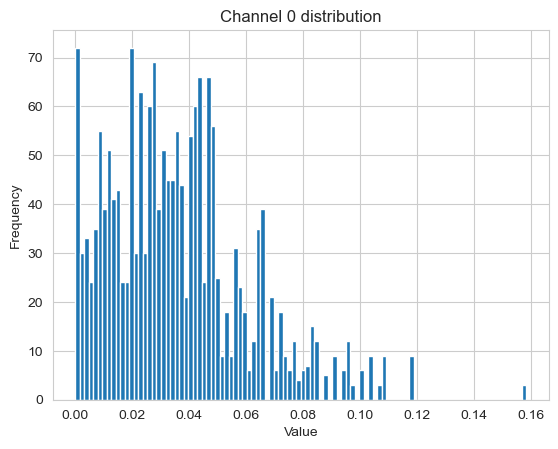

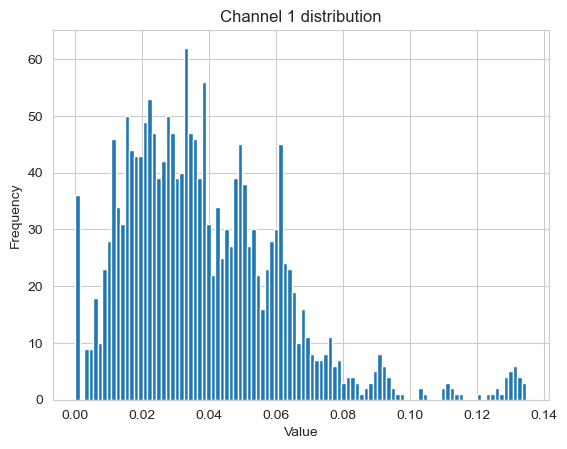

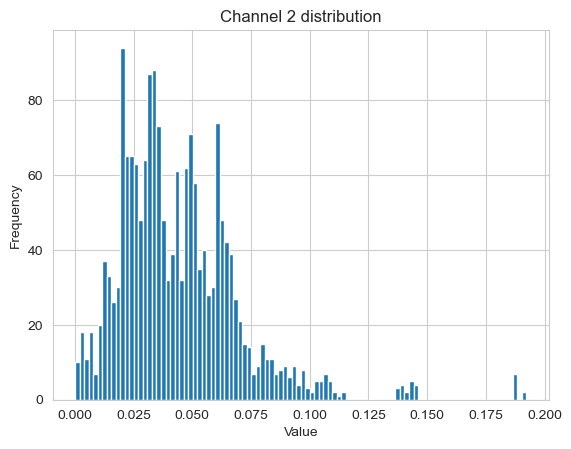

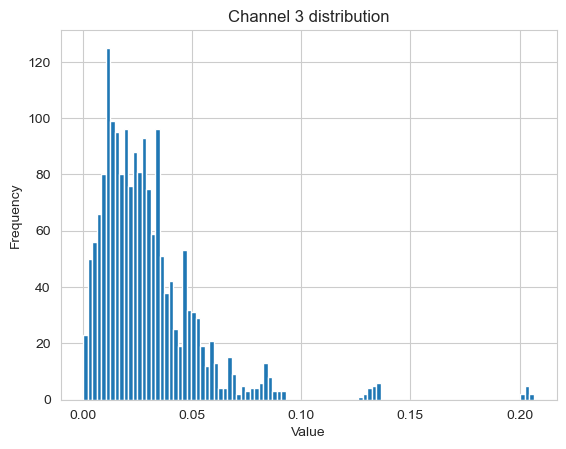

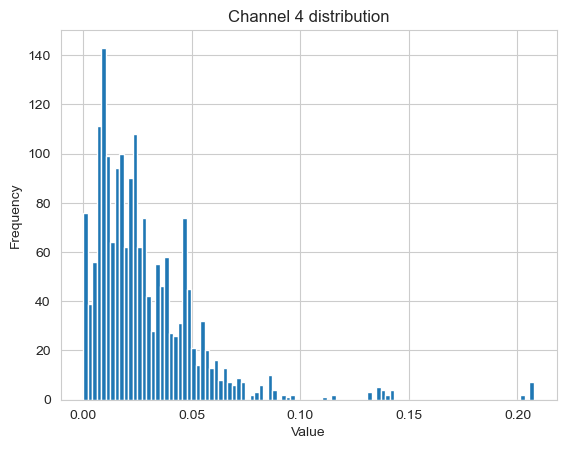

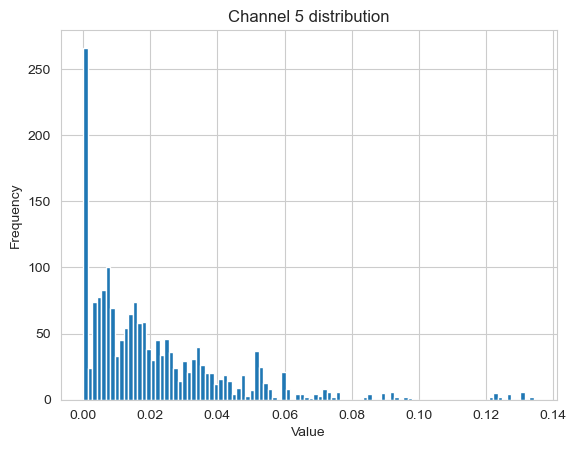

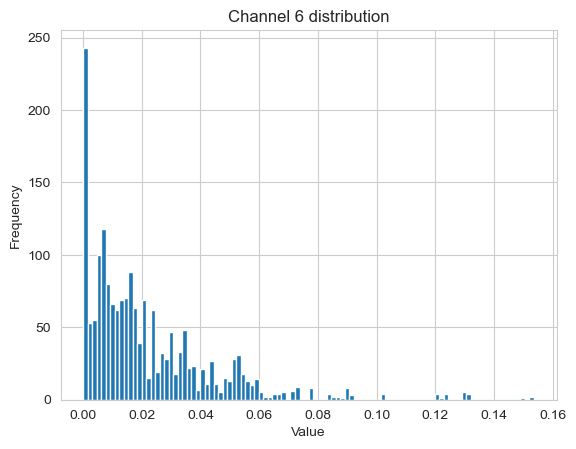

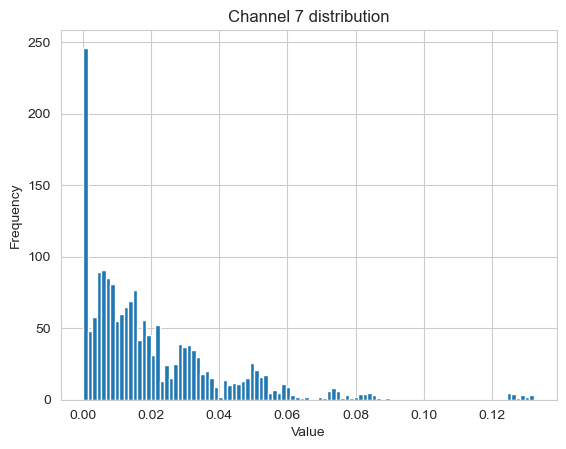

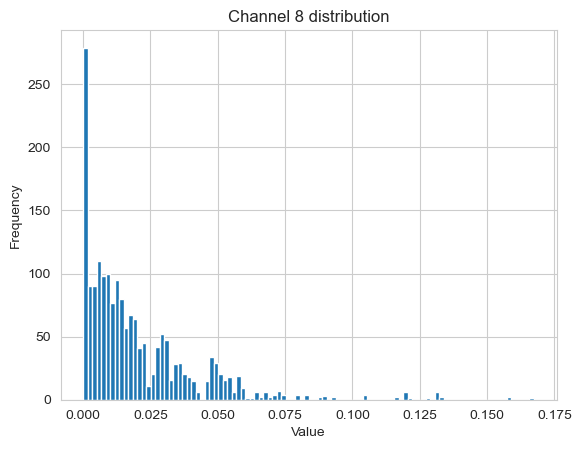

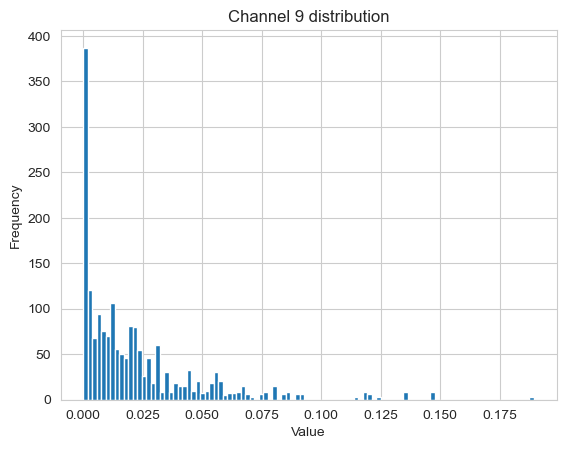

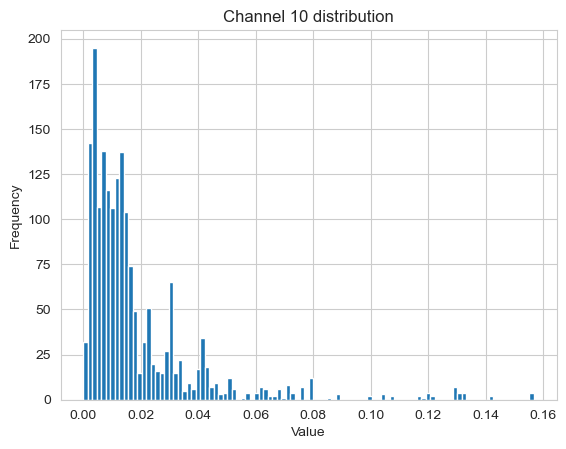

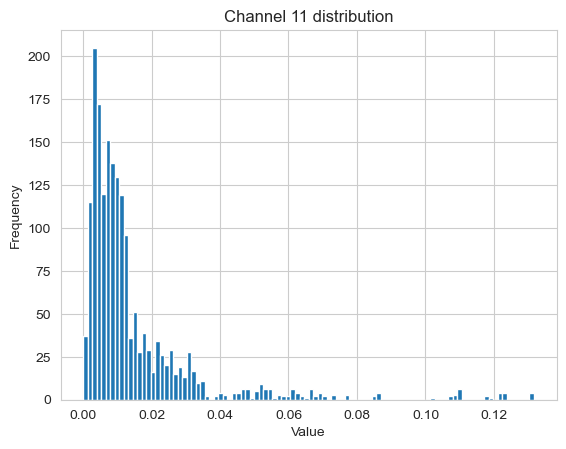

In [67]:
N, C, H, W = X.shape

for c in range(C):
    values = X[:, c, :, :].reshape(-1)

    plt.figure()
    plt.hist(values, bins=100)
    plt.title(f"Channel {c} distribution")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

In [68]:
# 로그 변환
X_log = X.copy()

for c in range(C):
    band = X[:, c, :, :]

    if np.min(band) >= 0:
        X_log[:, c, :, :] = np.log1p(band)
    else:
        print(f"Channel {c} has negative values → skip log")

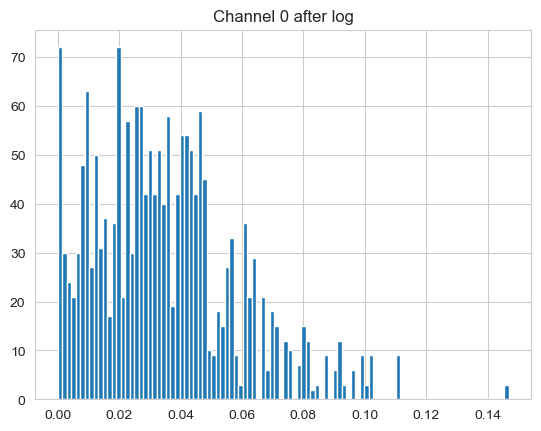

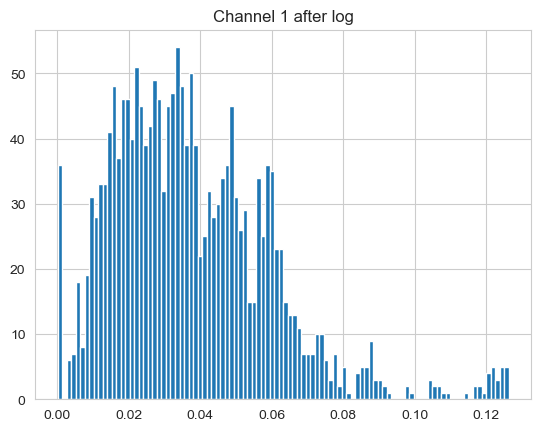

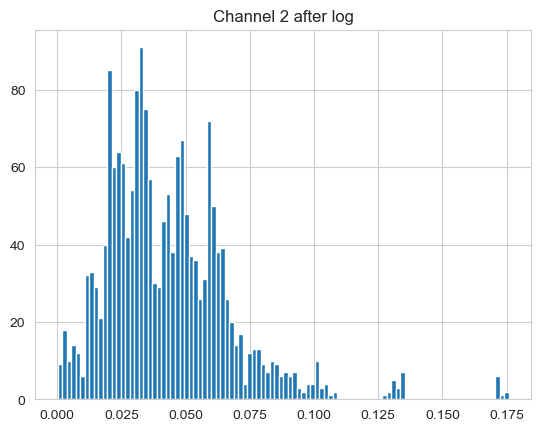

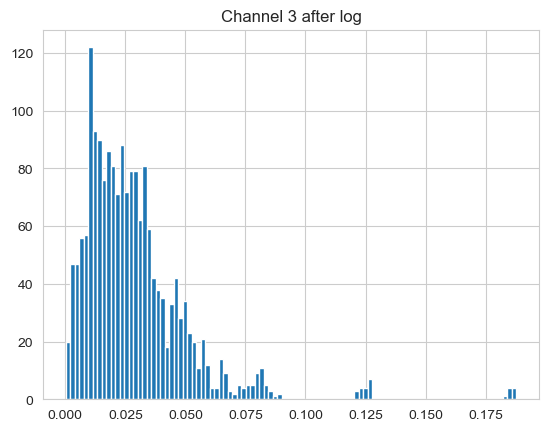

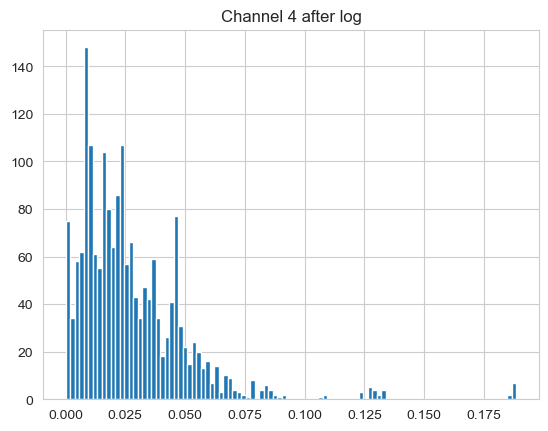

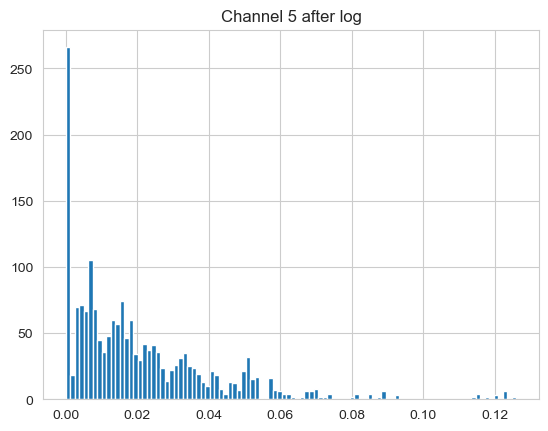

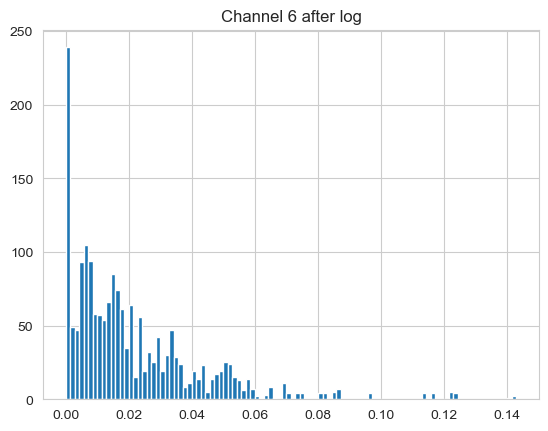

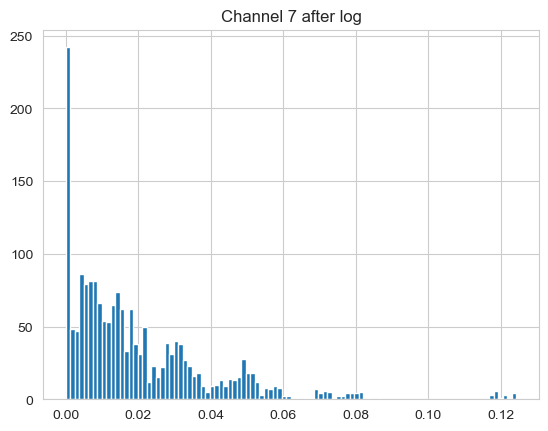

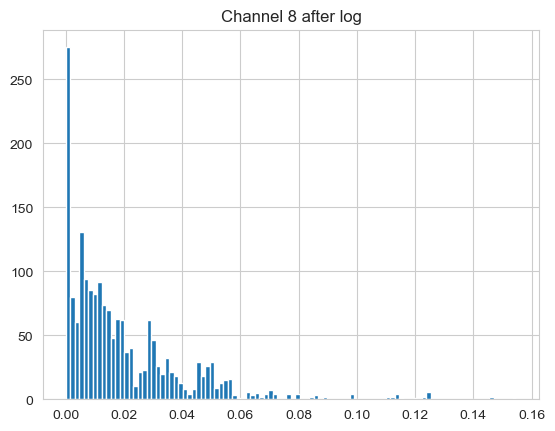

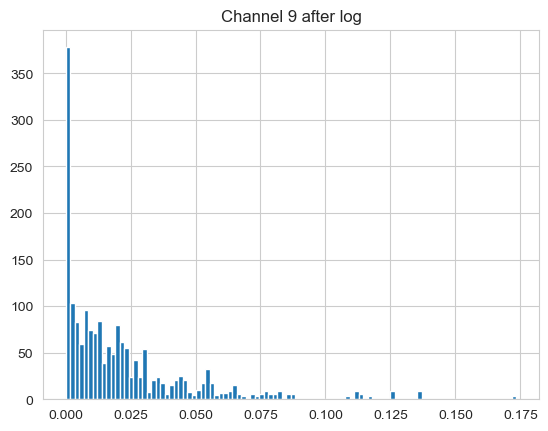

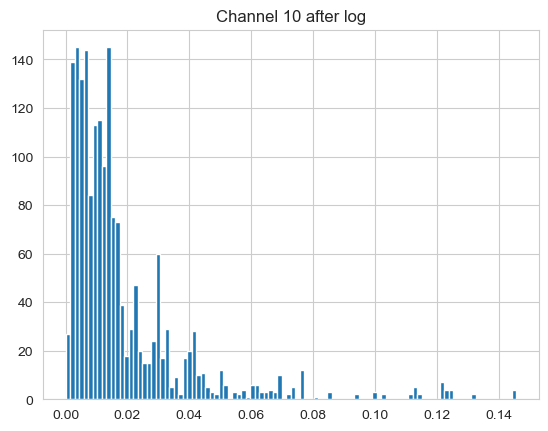

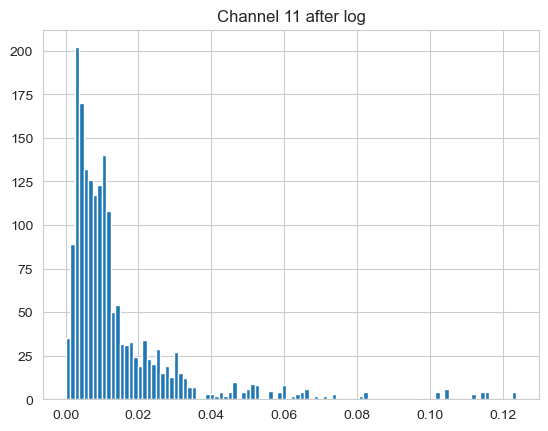

In [69]:
# 로그 변환 분포 확인
for c in range(C):
    values = X_log[:, c, :, :].reshape(-1)

    plt.figure()
    plt.hist(values, bins=100)
    plt.title(f"Channel {c} after log")
    plt.show()

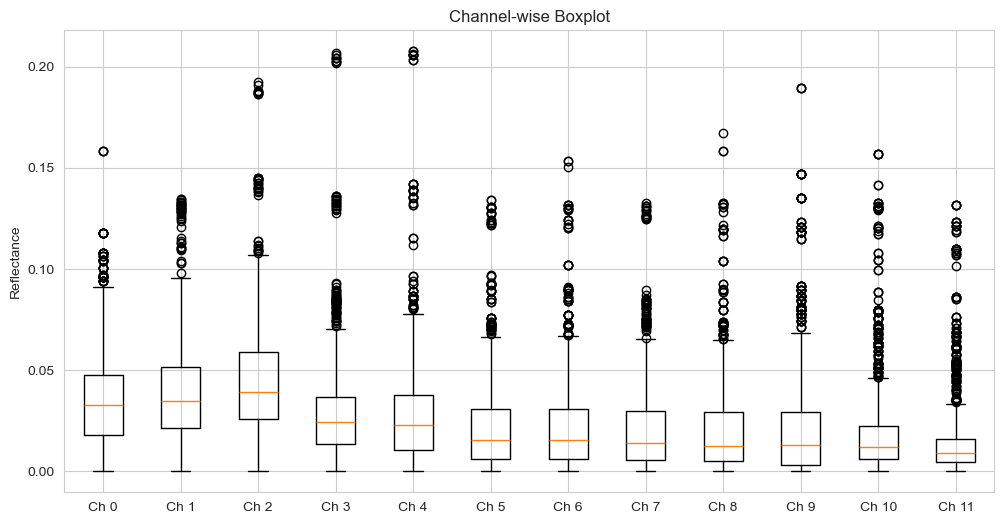

In [70]:
import numpy as np
import matplotlib.pyplot as plt

N, C, H, W = X.shape

data_for_plot = []

for c in range(C):
    values = X[:, c, :, :].reshape(-1)
    data_for_plot.append(values)

plt.figure(figsize=(12,6))
plt.boxplot(data_for_plot, showfliers=True)
plt.xticks(range(1, C+1), [f"Ch {i}" for i in range(C)])
plt.ylabel("Reflectance")
plt.title("Channel-wise Boxplot")
plt.show()


In [71]:
# import numpy as np

# 채널별 mean/std 계산
means = X.mean(axis=(0, 2, 3))
stds  = X.std(axis=(0, 2, 3))

# 2. Standardization 적용 (broadcasting)
X_scaled = (X - means[None, :, None, None]) / stds[None, :, None, None]

Y_mean = Y.mean()
Y_std  = Y.std()

Y_scaled = (Y - Y_mean) / Y_std

print("Y mean check:", Y_scaled.mean())
print("Y std check :", Y_scaled.std())

# 3. 확인
print("Mean check:", X_scaled.mean(axis=(0,2,3)))
print("Std check :", X_scaled.std(axis=(0,2,3)))

Y mean check: -8.882261e-08
Y std check : 1.0
Mean check: [-2.0933048e-07 -4.1294720e-07 -2.4932663e-07 -3.6671790e-07
 -1.3193534e-07 -1.3816850e-07 -4.5969596e-08  1.1427470e-08
 -3.0464597e-07 -4.2203723e-07  5.7397067e-08  4.6229310e-08]
Std check : [1.         1.         1.         1.0000001  0.9999999  1.0000001
 1.         0.9999997  0.99999994 1.         1.         1.0000001 ]


In [73]:
# 패치 저장
np.savez("/home/khs/data/hoso_data/2D_dataset_normal.npz", X=X_scaled, Y=Y_scaled)